In [617]:
import numpy as np
import matplotlib.pyplot as plt

# AHL Parameters
D = 0.01  # Diffusion coefficient
k = 0.001  # Chemotaxis coefficient
dt = 0.1  # Time step
T = 0.5  # Total simulation time
N = 100  # Number of grid points in each dimension
h = 10 / N  # Grid spacing
decay = 0.1  # Decay rate

# Cell Parameters
Dc = 0.001  # Diffusion coefficient
kc = 0.5  # Chemotaxis coefficient
grow = 0.1  # Growth rate
dtc = 0.1  # Time step
hc = 10 / N  # Grid spacing

# Initialize the grid
x = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, x)
u = np.zeros((N, N))  # Chemical concentration
v = np.ones((N, N))  # Cell density

# Add antibiotics at the center of the plate
center = N // 2
radius = N // 100
# central circle area of u is 1.0
for i in range(len(u)):
    for j in range(len(u)):
        if (i-center)**2 + (j-center)**2 <= radius**2:
            v[i,j] = 10.0
# u[center-radius:center+radius, center-radius:center+radius] = 1.0



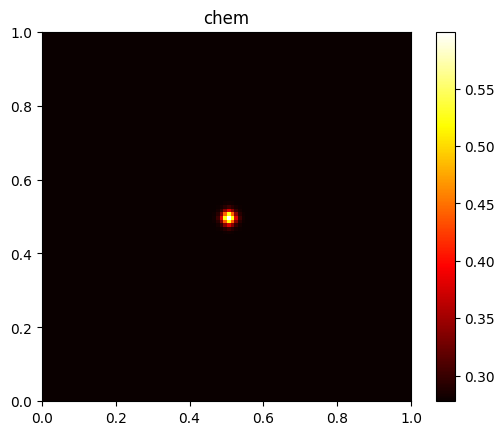

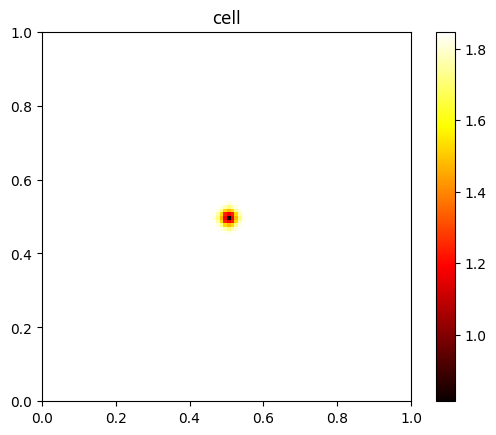

In [426]:
# test the initiation
plot_img(u,"chem")
plot_img(v,"cell")

In [3]:
# plot data
def plot_img(data, title):
    plt.imshow(data, cmap='hot', extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.title(title)
    plt.show()

In [155]:
# laplacian
def laplacian(data, h):
    lapl = np.roll(data, 1, axis=0) + np.roll(data, -1, axis=0) + \
                  np.roll(data, 1, axis=1) + np.roll(data, -1, axis=1) - 4 * data
    lapl /= h**2
    return lapl

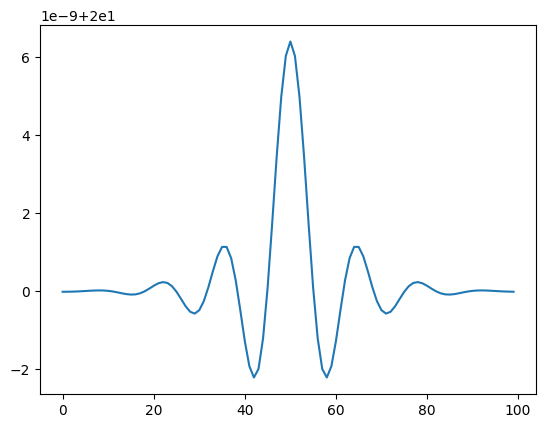

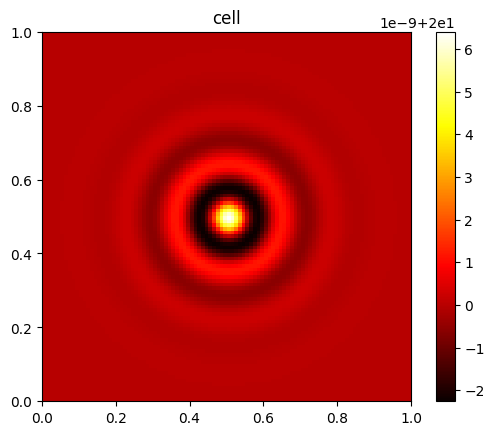

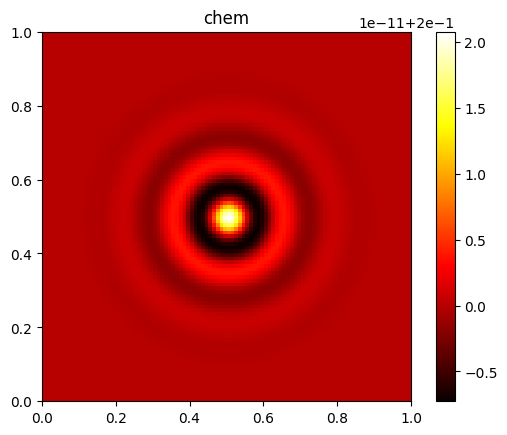

In [620]:
# Simulation loop
for step in range(2000):

    for t in np.arange(0, T, dt):
        laplacian_u = laplacian(u, h)
        delta_u = D * laplacian_u - decay * u + k * v
        u += dt * delta_u

    laplacian_v = laplacian(v, hc)
    delta_v = Dc * laplacian_v + grow * v - kc * u * v
    v += dtc * delta_v
     
plt.plot(v[50,])
plt.show()

plot_img(v, 'cell')
plot_img(u, 'chem')

[1.03740696 1.03740614 1.03740365 1.03739937 1.03739309 1.03738452
 1.03737326 1.0373588  1.03734048 1.03731749 1.03728885 1.03725335
 1.03720951 1.03715556 1.03708935 1.03700833 1.03690939 1.03678886
 1.03664229 1.03646442 1.0362489  1.03598821 1.03567331 1.03529343
 1.03483566 1.03428455 1.03362158 1.03282451 1.03186656 1.0307154
 1.02933197 1.02766882 1.02566819 1.02325948 1.02035598 1.0168508
 1.01261164 1.00747502 1.00124285 0.993695   0.98466509 0.97431673
 0.9639368  0.95775366 0.96602168 1.00784801 1.10845284 1.28328682
 1.51015689 1.71360623 1.79674096 1.71360623 1.51015689 1.28328682
 1.10845284 1.00784801 0.96602168 0.95775366 0.9639368  0.97431673
 0.98466509 0.993695   1.00124285 1.00747502 1.01261164 1.0168508
 1.02035598 1.02325948 1.02566819 1.02766882 1.02933197 1.0307154
 1.03186656 1.03282451 1.03362158 1.03428455 1.03483566 1.03529343
 1.03567331 1.03598821 1.0362489  1.03646442 1.03664229 1.03678886
 1.03690939 1.03700833 1.03708935 1.03715556 1.03720951 1.03725335

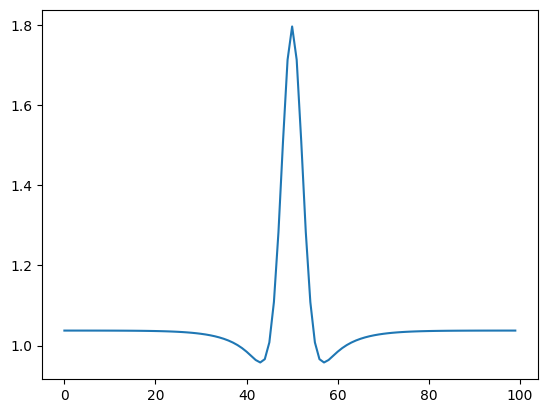

In [575]:
print(v[50,])
# plot v[50,]
plt.plot(v[50,])
plt.show()

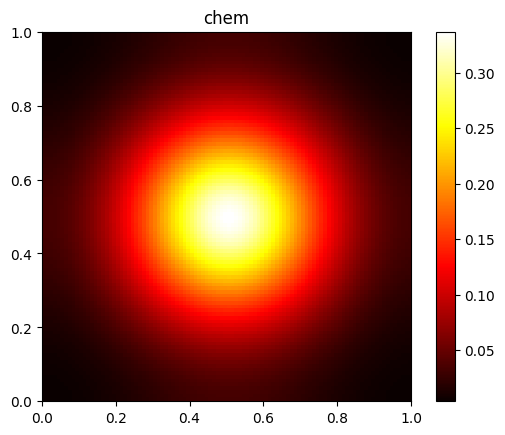

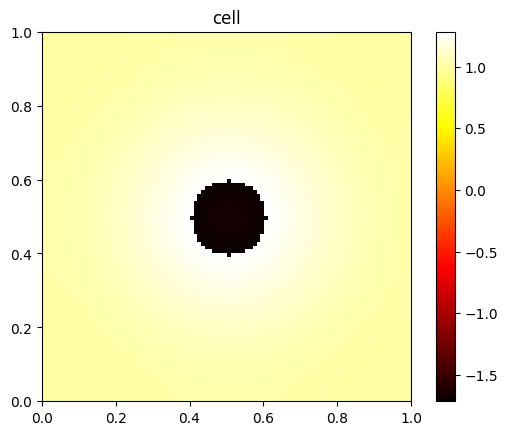

In [48]:
# (old version) Simulation loop
for t in np.arange(0, T, dt):
    # Laplacian of u
    laplacian_u = laplacian(u, h)
    laplacian_v = laplacian(v, hc)
    
    # Update u and v
    u += dt * (D * laplacian_u - k * u * v)
    v += dt * (Dc* laplacian_v - kc * u * v)

plot_img(u, 'chem')
plot_img(v, 'cell')